In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import read_classification_dataset, features_histograms_mean_std
# import sklearn
from sklearnex import patch_sklearn
from sklearn.calibration import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from soft_impute import SoftImputer
from svd_impute import SVDImputer
from sklearn.ensemble import BaggingClassifier
import joblib

from kneed import KneeLocator

patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [31]:
train, target, test = read_classification_dataset(1)
X, y = train.values, target.values.flatten()
pd.read_csv("classify/TrainData2.txt", delim_whitespace=True, header=None)

,0,1,2,3,4,5,6,7,8,9,...,9172,9173,9174,9175,9176,9177,9178,9179,9180,9181
0,2.357935,1.505150,1.477121,1.301030,2.992995,1.301030,2.729974,3.275542,3.531734,2.117271,...,1.531479,1.792392,2.000000,1.477121,1.919078,1.755875,2.025306,2.107210,1.869232,1.30103
1,1.995635,1.633468,1.740363,1.819544,3.703377,1.301030,3.000434,3.118926,3.363424,1.568202,...,1.755875,2.064458,1.431364,1.633468,1.954243,1.913814,2.685742,2.952308,1.959041,1.30103
2,1.929419,1.301030,1.447158,1.301030,3.377852,1.301030,3.053463,3.390405,3.359835,1.707570,...,1.982271,2.198657,1.301030,1.707570,2.041393,1.934498,1.792392,1.880814,1.963788,1.30103
3,2.227887,1.602060,1.556302,1.908485,3.424392,1.301030,3.084219,3.288696,3.364176,1.301030,...,1.792392,2.204120,1.633468,1.716003,1.913814,2.130334,1.778151,1.838849,1.949390,1.30103
4,1.763428,1.623249,1.301030,2.029384,3.551694,1.301030,3.165541,3.141450,3.495128,1.886491,...,1.301030,1.785330,2.201397,1.623249,1.863323,1.913814,1.778151,1.698970,1.869232,1.30103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.610660,1.698970,1.301030,1.301030,2.161368,1.301030,3.155032,3.161667,3.141450,1.929419,...,1.778151,1.949390,2.549003,1.770852,1.812913,2.195900,1.633468,1.792392,1.939519,1.30103
96,2.720986,1.690196,2.294466,1.397940,1.301030,1.301030,3.174641,4.056371,3.248709,1.301030,...,2.281033,1.755875,1.301030,2.278754,2.021189,1.959041,1.301030,1.301030,2.303196,1.30103
97,2.534026,1.707570,1.301030,1.301030,2.403120,3.033424,3.232996,3.246499,3.013259,1.301030,...,1.986772,2.257679,2.146128,2.093422,2.004321,2.133539,1.568202,1.724276,2.178977,1.30103
98,2.495544,1.643453,1.690196,1.301030,2.403120,2.371068,3.125481,3.230449,3.378398,1.763428,...,1.763428,1.397940,1.301030,1.857333,1.939519,2.075547,1.301030,1.633468,2.017033,1.30103


In [15]:
model = Pipeline([
    ('Scaler', StandardScaler()),
    ('Imputer', KNNImputer()),
    ("PCA",PCA(n_components=24)),
    ('KNN', KNeighborsClassifier(n_neighbors=3))
])
param_grid = [
    # {
    #     "Imputer": [SVDImputer(max_iterations=50)],
    #     "KNN__n_neighbors":[3],
    #     "KNN": [KNeighborsClassifier(weights="distance")]
    # },
    {
        "Imputer": [KNNImputer(weights='distance'),],
        "Imputer__n_neighbors":[1,3,7],
        "KNN__n_neighbors":[1,3,7],
        "KNN": [KNeighborsClassifier(weights="distance")]
    },

]

grid = GridSearchCV(model, param_grid, scoring="f1_macro", n_jobs=-1, verbose=1)
grid.fit(X, y)
grid.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


c:\Users\Morri\Documents\Notebooks\ML\Project\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Pipeline(steps=[('Scaler', StandardScaler()),
                ('Imputer', KNNImputer(n_neighbors=1, weights='distance')),
                ('PCA', PCA(n_components=24)),
                ('KNN',
                 KNeighborsClassifier(n_neighbors=3, weights='distance'))])

In [16]:

print(grid.best_score_)
print(grid.best_params_)
prediction = grid.best_estimator_.predict(test.values)
display(prediction)

0.8910707070707069
{'Imputer': KNNImputer(weights='distance'), 'Imputer__n_neighbors': 1, 'KNN': KNeighborsClassifier(weights='distance'), 'KNN__n_neighbors': 3}


array([2, 1, 1, 1, 1, 2, 1, 1, 3, 2, 3, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 4,
       3, 3, 4, 1, 5, 4, 1, 3, 1, 1, 4, 1, 1, 1, 1, 4, 3, 5, 3, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [17]:
res = grid.cv_results_
param_scores = list((zip(res["rank_test_score"],res["mean_test_score"],res["params"], )))
param_scores.sort(key=lambda x: x[0])
param_scores

[(1,
  0.8910707070707069,
  {'Imputer': KNNImputer(weights='distance'),
   'Imputer__n_neighbors': 1,
   'KNN': KNeighborsClassifier(weights='distance'),
   'KNN__n_neighbors': 3}),
 (2,
  0.8679182522903452,
  {'Imputer': KNNImputer(weights='distance'),
   'Imputer__n_neighbors': 3,
   'KNN': KNeighborsClassifier(weights='distance'),
   'KNN__n_neighbors': 3}),
 (2,
  0.8679182522903452,
  {'Imputer': KNNImputer(weights='distance'),
   'Imputer__n_neighbors': 7,
   'KNN': KNeighborsClassifier(weights='distance'),
   'KNN__n_neighbors': 3}),
 (4,
  0.8203435014597804,
  {'Imputer': KNNImputer(weights='distance'),
   'Imputer__n_neighbors': 3,
   'KNN': KNeighborsClassifier(weights='distance'),
   'KNN__n_neighbors': 1}),
 (4,
  0.8203435014597804,
  {'Imputer': KNNImputer(weights='distance'),
   'Imputer__n_neighbors': 7,
   'KNN': KNeighborsClassifier(weights='distance'),
   'KNN__n_neighbors': 1}),
 (6,
  0.8025657236820027,
  {'Imputer': KNNImputer(weights='distance'),
   'Imputer_

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       108
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         3

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



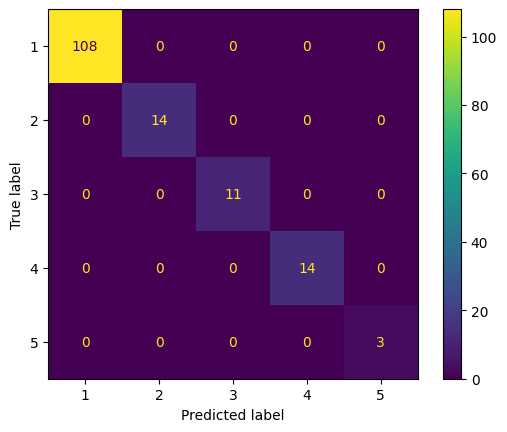

In [18]:
best_model_path = './models/c_1_Scale_KNNI(3)_PCA(24)_KNN(3).pkl'
joblib.dump(grid.best_estimator_, best_model_path)
best_model = joblib.load(best_model_path)
pred = best_model.predict(X)
print(classification_report(y, pred))
fig = ConfusionMatrixDisplay.from_predictions(y, pred)

In [24]:
model = Pipeline([

    ('Scaler', StandardScaler()),
    ("Imputer",SVDImputer(max_iterations=50)),
    ("RF", RandomForestClassifier(max_depth=4, n_jobs=-1))
    # #   ('Imputer', KNNImputer()),
    # ('KNN', KNeighborsClassifier(n_neighbors=3))
])
cross_val_score(model, X, y, scoring="f1_macro")

c:\Users\Morri\Documents\Notebooks\ML\Project\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


array([0.60416667, 0.73404255, 0.61594203, 0.58666667, 0.58666667])

In [14]:
print(_.mean())
a = _

0.8404031007751938


In [7]:
model = Pipeline([
      ('Scaler', StandardScaler()),
      ('Imputer', KNNImputer()),
      ('GB', GradientBoostingClassifier(random_state=30))
    ])
"""loss: Literal['log_loss', 'deviance', 'exponential'] = "log_loss",
    learning_rate: Float = 0.1,
    n_estimators: Int = 100,
    subsample: Float = 1,
    criterion: Literal['friedman_mse', 'squared_error'] = "friedman_mse",
    min_samples_split: float | int = 2,
    min_samples_leaf: float | int = 1,
    min_weight_fraction_leaf: Float = 0,
    max_depth: int | None = 3,
    min_impurity_decrease: Float = 0,
    init: str | BaseEstimator | None = None,
    random_state: Int | RandomState | None = None,
    max_features: float | int | Literal['auto', 'sqrt', 'log2'] | None = None,
    verbose: Int = 0,
    max_leaf_nodes: Int | None = None,
    warm_start: bool = False,
    validation_fraction: Float = 0.1,
    n_iter_no_change: Int | None = None,
    tol: Float = 0.0001,
    ccp_alpha: float = 0"""
param_grid = [
    {
        "Imputer": [SimpleImputer(strategy="mean")],
        "GB__n_estimators":[100, 150],
        "GB":[AdaBoostClassifier(random_state=30), GradientBoostingClassifier(random_state=30)]

    },
    {
        "Imputer": [KNNImputer(weights='distance')],
        "Imputer__n_neighbors":[1,3],
        "GB__n_estimators":[100, 150],
        "GB":[AdaBoostClassifier(random_state=30), GradientBoostingClassifier(random_state=30)]
    },
]

grid = GridSearchCV(model, param_grid, scoring="f1_weighted", verbose=1, n_jobs=-1)
grid.fit(X, y)
print(grid.best_score_)
print(grid.best_params_)
prediction = grid.best_estimator_.predict(test.values)
display(prediction)
res = grid.cv_results_
param_scores = list((zip(res["rank_test_score"],res["mean_test_score"],res["params"], )))
param_scores.sort(key=lambda x: x[0])

c:\Users\Morri\Documents\Notebooks\ML\Project\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


KeyboardInterrupt: 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       108
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         3

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



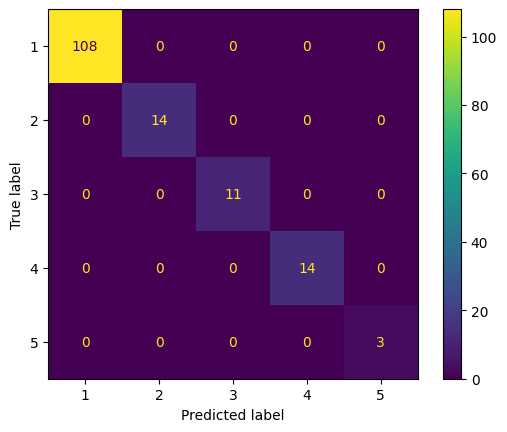

In [38]:
best_model_path = './models/c_1_Scale_KNN(3)_GB(150).pkl'
try:
    best_model = joblib.load(best_model_path)
except FileNotFoundError:
    joblib.dump(grid.best_estimator_, best_model_path)
    best_model = joblib.load(best_model_path)
pred = best_model.predict(X)
print(classification_report(y, pred))
fig = ConfusionMatrixDisplay.from_predictions(y, pred)

In [39]:
param_scores

[(1,
  0.9170831917044941,
  {'GB': GradientBoostingClassifier(random_state=30),
   'GB__n_estimators': 150,
   'Imputer': KNNImputer(weights='distance'),
   'Imputer__n_neighbors': 3}),
 (2,
  0.9138309339239571,
  {'GB': GradientBoostingClassifier(random_state=30),
   'GB__n_estimators': 100,
   'Imputer': SimpleImputer()}),
 (2,
  0.9138309339239571,
  {'GB': GradientBoostingClassifier(random_state=30),
   'GB__n_estimators': 150,
   'Imputer': SimpleImputer()}),
 (4,
  0.9123390056579825,
  {'GB': GradientBoostingClassifier(random_state=30),
   'GB__n_estimators': 150,
   'Imputer': KNNImputer(weights='distance'),
   'Imputer__n_neighbors': 1}),
 (5,
  0.9053337827210426,
  {'GB': GradientBoostingClassifier(random_state=30),
   'GB__n_estimators': 100,
   'Imputer': KNNImputer(weights='distance'),
   'Imputer__n_neighbors': 3}),
 (6,
  0.900589596674531,
  {'GB': GradientBoostingClassifier(random_state=30),
   'GB__n_estimators': 100,
   'Imputer': KNNImputer(weights='distance'),
 

In [8]:
model = Pipeline([
        ("Imputer", SimpleImputer(strategy="mean")),
        ('Scaler', StandardScaler()),
        ('PCA', PCA(n_components=24)),
        ('GB', GradientBoostingClassifier(random_state=30))
    ])
param_grid = [{
        "PCA__n_components":list(range(20, 28)),
        "GB__n_estimators":[75, 100, 150, 200, 250],
    },]

grid = GridSearchCV(model, param_grid, scoring="f1_macro", n_jobs=-1, verbose=1)
grid.fit(X, y)
print(grid.best_score_)
print(grid.best_params_)
prediction = grid.best_estimator_.predict(test.values)
display(prediction)
res = grid.cv_results_
param_scores = list((zip(res["rank_test_score"],res["mean_test_score"],res["params"], )))
param_scores.sort(key=lambda x: x[0])
param_scores

Fitting 5 folds for each of 40 candidates, totalling 200 fits


c:\Users\Morri\Documents\Notebooks\ML\Project\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


0.8651817291797069
{'GB__n_estimators': 75, 'PCA__n_components': 20}


array([2, 1, 1, 1, 1, 2, 1, 1, 3, 2, 3, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4,
       3, 1, 4, 1, 1, 4, 1, 3, 1, 1, 4, 1, 1, 1, 1, 4, 3, 1, 1, 1, 4, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1], dtype=int64)

[(1, 0.8651817291797069, {'GB__n_estimators': 75, 'PCA__n_components': 20}),
 (2, 0.8644700420352593, {'GB__n_estimators': 75, 'PCA__n_components': 24}),
 (2, 0.8644700420352593, {'GB__n_estimators': 75, 'PCA__n_components': 27}),
 (2, 0.8644700420352593, {'GB__n_estimators': 150, 'PCA__n_components': 24}),
 (2, 0.8644700420352593, {'GB__n_estimators': 200, 'PCA__n_components': 22}),
 (2, 0.8644700420352593, {'GB__n_estimators': 250, 'PCA__n_components': 20}),
 (7, 0.8618000866676298, {'GB__n_estimators': 250, 'PCA__n_components': 22}),
 (8, 0.8587716293368468, {'GB__n_estimators': 100, 'PCA__n_components': 26}),
 (9, 0.8576294623251146, {'GB__n_estimators': 100, 'PCA__n_components': 20}),
 (9, 0.8576294623251146, {'GB__n_estimators': 100, 'PCA__n_components': 21}),
 (9, 0.8576294623251146, {'GB__n_estimators': 100, 'PCA__n_components': 22}),
 (9, 0.8576294623251146, {'GB__n_estimators': 100, 'PCA__n_components': 27}),
 (9, 0.8576294623251146, {'GB__n_estimators': 150, 'PCA__n_componen

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       108
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         3

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



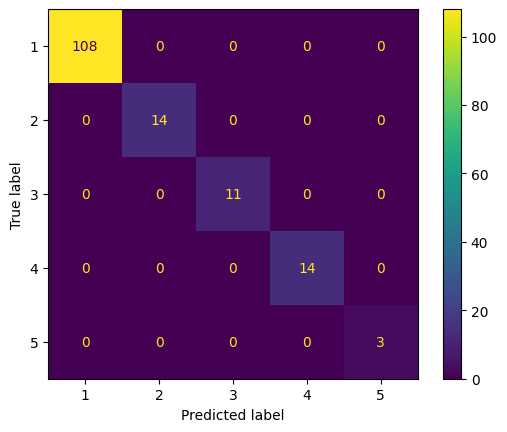

In [9]:
best_model_path = './models/c_1_Scale_Simple_PCA(2)_GB(200).pkl'
# joblib.dump(grid.best_estimator_, best_model_path)
# best_model = joblib.load(best_model_path)
# try:
#     best_model = joblib.load(best_model_path)
# except FileNotFoundError:
#     joblib.dump(grid.best_estimator_, best_model_path)
#     best_model = joblib.load(best_model_path)
pred = grid.best_estimator_.predict(X)
print(classification_report(y, pred))
fig = ConfusionMatrixDisplay.from_predictions(y, pred)